In [1]:
# imports
import pandas as pd
import numpy as np
#import seborn
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data = pd.read_csv("accepted_2007_to_2018Q4.csv", engine='c')
data = data.drop(['id', 'member_id', 'settlement_term','settlement_percentage', 'settlement_amount', 'settlement_date','settlement_status', 'debt_settlement_flag_date', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'orig_projected_additional_accrued_interest',
           'hardship_loan_status', 'hardship_dpd', 'hardship_length','payment_plan_start_date','hardship_end_date', 'hardship_start_date', 'hardship_amount', 'deferral_term', 'hardship_status', 'hardship_reason', 'hardship_type',
           'sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
           'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'url', 'revol_bal_joint','mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d',
           'il_util', 'mths_since_rcnt_il','mths_since_last_delinq', 'zip_code', 'last_pymnt_d' ], axis=1)

#data = data.dropna()
#data
# maybe takeout these features as well:
# debt_settlement_flag

# I have left 'hardship_flag' included

# features removed on the second round of cleaning after looking at amount of missing rows in excel
#'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_since_last_delinq'

# i removed zip codes since i couldnt categorize or group areas toghether, since the zip codes were obscured/sensored / hidden the original value

# i removed 'last_payment_d' as i dont this its necessary and since iit would mostly apply to rows where loan status = current 


# idk what 'il_util' is but i removed it
data.convert_dtypes()
data.dtypes
display(data)

C:\Users\zachs\AppData\Local\Temp\ipykernel_17072\168980636.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("accepted_2007_to_2018Q4.csv", engine='c')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y
2260698,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,...,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,N
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Analysis on missing data:
# sort columns by amount of missing data in them

# Count the number of missing values in each column
missing_counts = data.isnull().sum().sort_values(ascending=False)

display(missing_counts)

# Sort columns by the number of missing values in descending order
sorted_columns = missing_counts.sort_values(ascending=False).index

# Reorder the DataFrame columns based on the sorted order
sorted_df = data[sorted_columns]

# sorted_df now contains the DataFrame with columns sorted by missing values
display(sorted_df)

all_util                866381
open_acc_6m             866163
inq_last_12m            866163
total_cu_tl             866163
open_il_24m             866162
                         ...  
last_pymnt_amnt             33
last_fico_range_high        33
last_fico_range_low         33
policy_code                 33
debt_settlement_flag        33
Length: 101, dtype: int64

,all_util,total_cu_tl,open_acc_6m,inq_last_12m,open_il_24m,inq_fi,max_bal_bc,open_rv_24m,open_act_il,open_il_12m,...,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,loan_status,pymnt_plan,debt_settlement_flag
0,34.0,1.0,2.0,4.0,1.0,3.0,722.0,3.0,2.0,0.0,...,36 months,13.99,123.03,C,C4,Not Verified,Dec-2015,Fully Paid,n,N
1,29.0,0.0,1.0,6.0,1.0,0.0,6472.0,3.0,1.0,0.0,...,36 months,11.99,820.28,C,C1,Not Verified,Dec-2015,Fully Paid,n,N
2,65.0,5.0,0.0,1.0,4.0,2.0,2081.0,2.0,1.0,0.0,...,60 months,10.78,432.66,B,B4,Not Verified,Dec-2015,Fully Paid,n,N
3,45.0,1.0,1.0,0.0,1.0,0.0,6987.0,1.0,1.0,0.0,...,60 months,14.85,829.90,C,C5,Source Verified,Dec-2015,Current,n,N
4,78.0,1.0,1.0,3.0,3.0,2.0,9702.0,7.0,3.0,0.0,...,60 months,22.45,289.91,F,F1,Source Verified,Dec-2015,Fully Paid,n,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,51.0,0.0,0.0,2.0,1.0,3.0,5141.0,0.0,2.0,0.0,...,60 months,10.49,859.56,B,B3,Verified,Oct-2016,Current,n,N
2260697,73.0,0.0,0.0,1.0,2.0,0.0,6172.0,5.0,2.0,0.0,...,60 months,14.49,564.56,C,C4,Not Verified,Oct-2016,Charged Off,n,Y
2260698,84.0,1.0,0.0,2.0,2.0,3.0,4093.0,1.0,1.0,1.0,...,60 months,14.49,329.33,C,C4,Verified,Oct-2016,Current,n,N
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Analysis on missing data:
# sort rows by amount of missing data in them

# Count the number of missing values in each row
missing_counts_rows = data.isnull().sum(axis=1).sort_values(ascending=False)

# Sort rows by the number of missing values in descending order
sorted_df_rows = data.loc[missing_counts_rows.sort_values(ascending=False).index]
# sorted_df now contains the DataFrame with rows sorted by missing values
display(missing_counts_rows)
display(sorted_df_rows)

2260700    101
421095     101
1654416    101
1654415    101
1651665    101
          ... 
502172       0
502174       0
502176       0
502178       0
0            0
Length: 2260701, dtype: int64

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
2260700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024966,15000.0,15000.0,15000.0,36 months,8.99,476.93,B,B1,Security,10+ years,...,66.7,0.0,0.0,219374.0,42221.0,13300.0,33474.0,N,Cash,N
2024967,5000.0,5000.0,5000.0,36 months,10.99,163.67,B,B4,Professor,3 years,...,66.7,0.0,0.0,92883.0,92975.0,6500.0,72983.0,N,Cash,N
2024968,3200.0,3200.0,3200.0,36 months,6.99,98.80,A,A2,Executive Director,4 years,...,16.7,0.0,0.0,237015.0,195849.0,39500.0,193515.0,N,Cash,N
2024970,24000.0,24000.0,24000.0,60 months,13.99,558.32,C,C3,dispatch manager,10+ years,...,50.0,0.0,0.0,263153.0,33455.0,5800.0,31803.0,N,Cash,N


In [5]:
data_droppedna = data.dropna(thresh=90)
display(data_droppedna)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,7 years,...,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,N,Cash,N
2260695,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,10+ years,...,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,N
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y


In [6]:
# Analysis on missing data:
# sort rows by amount of missing data in them

# Count the number of missing values in each row
missing_counts_rows = data_droppedna.isnull().sum(axis=1).sort_values(ascending=False)

# Sort rows by the number of missing values in descending order
sorted_df_rows = data_droppedna.loc[missing_counts_rows.sort_values(ascending=False).index]
# sorted_df now contains the DataFrame with rows sorted by missing values
display(missing_counts_rows)
display(sorted_df_rows)

2110270    11
832060     11
436974     10
1473841    10
2131237    10
           ..
1085002     0
608090      0
1085005     0
1085006     0
0           0
Length: 1394539, dtype: int64

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
2110270,3600.0,3600.0,3600.0,36 months,11.99,119.56,B,B5,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
832060,3000.0,3000.0,3000.0,36 months,7.84,93.79,A,A4,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
436974,2500.0,2500.0,2500.0,36 months,15.04,86.72,C,C4,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2090054,16000.0,16000.0,16000.0,60 months,9.44,335.57,B,B1,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1473841,17500.0,17500.0,17500.0,36 months,12.73,587.38,B,B5,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208022,32000.0,32000.0,32000.0,60 months,12.74,723.85,C,C1,"RN, BSN",2 years,...,100.0,1.0,0.0,104046.0,89208.0,7900.0,89046.0,N,Cash,N
2208023,15000.0,15000.0,15000.0,36 months,11.44,494.22,B,B4,Manager,7 years,...,16.7,0.0,0.0,104514.0,19012.0,22500.0,7014.0,N,Cash,N
13655,17100.0,17100.0,17100.0,60 months,18.49,438.80,E,E2,Information Technology Specialist 5,10+ years,...,25.0,0.0,0.0,376067.0,125225.0,17000.0,107495.0,N,Cash,N
13654,10000.0,10000.0,10000.0,60 months,15.41,240.06,D,D1,Fitness/Benefits Coord.,10+ years,...,60.0,0.0,0.0,21100.0,9204.0,10600.0,0.0,N,Cash,N


In [7]:

# apply normalization techniques 
#df_sklearn = data.copy() 
#for column  in df_sklearn.columns:
#    if df_sklearn[column].dtype == np.float64:
#        df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
#display(df_sklearn) 

In [8]:
#discretise Data

discretise_data = data_droppedna.copy() 

#for column  in discretise_data.columns:
#    if discretise_data[column].dtype == np.float64:
#        discretise_data[column] = pd.cut(discretise_data[column], bins= 10, labels= [0,1,2,3,4,5,6,7,8,9])
#display(discretise_data) 

discretized = pd.cut(discretise_data['loan_amnt'].dropna(), bins= 50)
discretized = pd.Series(discretized, index=discretise_data['loan_amnt'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['loan_amnt'].index)
discretized_full.update(discretized)
discretise_data['loan_amnt'] = discretized_full


discretized = pd.cut(discretise_data['funded_amnt'].dropna(), bins= 50)
discretized = pd.Series(discretized, index=discretise_data['funded_amnt'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['funded_amnt'].index)
discretized_full.update(discretized)
discretise_data['funded_amnt'] = discretized_full


discretized = pd.cut(discretise_data['funded_amnt_inv'].dropna(), bins= 50)
discretized = pd.Series(discretized, index=discretise_data['funded_amnt_inv'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['funded_amnt_inv'].index)
discretized_full.update(discretized)
discretise_data['funded_amnt_inv'] = discretized_full


discretized = pd.cut(discretise_data['int_rate'].dropna(), bins= 50)
discretized = pd.Series(discretized, index=discretise_data['int_rate'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['int_rate'].index)
discretized_full.update(discretized)
discretise_data['int_rate'] = discretized_full


discretized = pd.cut(discretise_data['installment'].dropna(), bins= 50)
discretized = pd.Series(discretized, index=discretise_data['installment'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['installment'].index)
discretized_full.update(discretized)
discretise_data['installment'] = discretized_full

discretized = discretise_data['emp_title'].dropna()
discretized = pd.Series(discretized, index=discretise_data['emp_title'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['emp_title'].index)
discretized_full.update(discretized)
discretise_data['emp_title'] = discretized_full

discretized = discretise_data['emp_length'].dropna()
discretized = pd.Series(discretized, index=discretise_data['emp_length'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['emp_length'].index)
discretized_full.update(discretized)
discretise_data['emp_length'] = discretized_full

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
annual_inc_dataframe = pd.DataFrame(discretise_data['annual_inc'])
est.fit(annual_inc_dataframe)
annual_inc_dataframe = est.transform(annual_inc_dataframe)
discretise_data['annual_inc'] = annual_inc_dataframe


discretise_data['loan_status'] = discretise_data['loan_status'].apply(lambda x: 'Fully Paid' if 'Fully Paid' in x else x)
#discretise_data['loan_status'] = discretise_data['loan_status'].apply(lambda x: 'Late' if 'Late' in x else x)

# 'Current'
values_to_keep = ['Fully Paid', 'Charged Off']
pattern = '|'.join(values_to_keep)

discretise_data = discretise_data[discretise_data['loan_status'].str.contains(pattern)]

discretized = discretise_data['title'].dropna()
discretized = pd.Series(discretized, index=discretise_data['title'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['title'].index)
discretized_full.update(discretized)
discretise_data['title'] = discretized_full



est = KBinsDiscretizer(n_bins = 50, encode='ordinal', strategy='kmeans')
dti_dataframe = np.array([discretise_data['dti'].dropna().to_numpy()]).transpose()
est.fit(dti_dataframe)
dti_dataframe = est.transform(dti_dataframe)
discretized = pd.Series(dti_dataframe.reshape(-1), index=discretise_data['dti'].dropna().index)
#discretized = pd.Series(discretized, index=discretise_data['dti'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['dti'].index)
discretized_full.update(discretized)
discretise_data['dti'] = discretized_full


#
#
est = KBinsDiscretizer(n_bins = 31, encode='ordinal', strategy='kmeans')
delinq_2yrs_dataframe = np.array([discretise_data['delinq_2yrs'].dropna().to_numpy()]).transpose()
est.fit(delinq_2yrs_dataframe)
delinq_2yrs_dataframe = est.transform(delinq_2yrs_dataframe)
discretized = pd.Series(delinq_2yrs_dataframe.reshape(-1), index=discretise_data['delinq_2yrs'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['delinq_2yrs'].index)
discretized_full.update(discretized)
discretise_data['delinq_2yrs'] = discretized_full
#
#
discretise_data['earliest_cr_line'] = discretise_data['earliest_cr_line'].apply(lambda x: x.split('-')[1])
#
discretise_data['fico_range_low'] = pd.cut(discretise_data['fico_range_low'], bins= 20)
discretise_data['fico_range_high'] = pd.cut(discretise_data['fico_range_high'], bins= 20)
#

est = KBinsDiscretizer(n_bins= 6, encode='ordinal', strategy='kmeans')
inq_last_6mths_dataframe = np.array([discretise_data['inq_last_6mths'].dropna().to_numpy()]).transpose()
est.fit(inq_last_6mths_dataframe)
inq_last_6mths_dataframe = est.transform(inq_last_6mths_dataframe)
discretized = pd.Series(inq_last_6mths_dataframe.reshape(-1), index=discretise_data['inq_last_6mths'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['inq_last_6mths'].index)
discretized_full.update(discretized)
discretise_data['inq_last_6mths'] = discretized_full
#
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
open_acc_dataframe = pd.DataFrame(discretise_data['open_acc'])
est.fit(open_acc_dataframe)
open_acc_dataframe = est.transform(open_acc_dataframe)
discretise_data['open_acc'] = open_acc_dataframe
#
est = KBinsDiscretizer(n_bins= 34, encode='ordinal', strategy='kmeans')
pub_rec_dataframe = pd.DataFrame(discretise_data['pub_rec'])
est.fit(pub_rec_dataframe)
pub_rec_dataframe = est.transform(pub_rec_dataframe)
discretise_data['pub_rec'] = pub_rec_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
revol_bal_dataframe = pd.DataFrame(discretise_data['revol_bal'])
est.fit(revol_bal_dataframe)
revol_bal_dataframe = est.transform(revol_bal_dataframe)
discretise_data['revol_bal'] = revol_bal_dataframe
#

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
revol_util_dataframe = np.array([discretise_data['revol_util'].dropna().to_numpy()]).transpose()
est.fit(revol_util_dataframe)
revol_util_dataframe = est.transform(revol_util_dataframe)
discretized = pd.Series(revol_util_dataframe.reshape(-1), index=discretise_data['revol_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['revol_util'].index)
discretized_full.update(discretized)
discretise_data['revol_util'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_acc_dataframe = pd.DataFrame(discretise_data['total_acc'])
est.fit(total_acc_dataframe)
total_acc_dataframe = est.transform(total_acc_dataframe)
discretise_data['total_acc'] = total_acc_dataframe
#
#
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
out_prncp_dataframe = pd.DataFrame(discretise_data['out_prncp'])
est.fit(out_prncp_dataframe)
out_prncp_dataframe = est.transform(out_prncp_dataframe)
discretise_data['out_prncp'] = out_prncp_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
out_prncp_inv_dataframe = pd.DataFrame(discretise_data['out_prncp_inv'])
est.fit(out_prncp_inv_dataframe)
out_prncp_inv_dataframe = est.transform(out_prncp_inv_dataframe)
discretise_data['out_prncp_inv'] = out_prncp_inv_dataframe
#
#
#discretise_data['total_pymnt'] = pd.cut(discretise_data['total_pymnt'], bins= 50)
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_pymnt_dataframe = pd.DataFrame(discretise_data['total_pymnt'])
est.fit(total_pymnt_dataframe)
total_pymnt_dataframe = est.transform(total_pymnt_dataframe)
discretise_data['total_pymnt'] = total_pymnt_dataframe
#
#discretise_data['total_pymnt_inv'] = pd.cut(discretise_data['total_pymnt_inv'], bins= 50)
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_pymnt_inv_dataframe = pd.DataFrame(discretise_data['total_pymnt_inv'])
est.fit(total_pymnt_inv_dataframe)
total_pymnt_inv_dataframe = est.transform(total_pymnt_inv_dataframe)
discretise_data['total_pymnt_inv'] = total_pymnt_inv_dataframe
#
#discretise_data['total_rec_prncp'] = pd.cut(discretise_data['total_rec_prncp'], bins= 50)
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_rec_prncp_dataframe = pd.DataFrame(discretise_data['total_rec_prncp'])
est.fit(total_rec_prncp_dataframe)
total_rec_prncp_dataframe = est.transform(total_rec_prncp_dataframe)
discretise_data['total_rec_prncp'] = total_rec_prncp_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_rec_int_dataframe = pd.DataFrame(discretise_data['total_rec_int'])
est.fit(total_rec_int_dataframe)
total_rec_int_dataframe = est.transform(total_rec_int_dataframe)
discretise_data['total_rec_int'] = total_rec_int_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_rec_late_fee_dataframe = pd.DataFrame(discretise_data['total_rec_late_fee'])
est.fit(total_rec_late_fee_dataframe)
total_rec_late_fee_dataframe = est.transform(total_rec_late_fee_dataframe)
discretise_data['total_rec_late_fee'] = total_rec_late_fee_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
recoveries_dataframe = pd.DataFrame(discretise_data['recoveries'])
est.fit(recoveries_dataframe)
recoveries_dataframe = est.transform(recoveries_dataframe)
discretise_data['recoveries'] = recoveries_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
collection_recovery_fee_dataframe = pd.DataFrame(discretise_data['collection_recovery_fee'])
est.fit(collection_recovery_fee_dataframe)
collection_recovery_fee_dataframe = est.transform(collection_recovery_fee_dataframe)
discretise_data['collection_recovery_fee'] = collection_recovery_fee_dataframe
#





est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
last_pymnt_amnt_dataframe = np.array([discretise_data['last_pymnt_amnt'].dropna().to_numpy()]).transpose()
est.fit(last_pymnt_amnt_dataframe)
last_pymnt_amnt_dataframe = est.transform(last_pymnt_amnt_dataframe)
discretized = pd.Series(last_pymnt_amnt_dataframe.reshape(-1), index=discretise_data['last_pymnt_amnt'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['last_pymnt_amnt'].index)
discretized_full.update(discretized)
discretise_data['last_pymnt_amnt'] = discretized_full

discretized = discretise_data['last_credit_pull_d'].dropna()
discretized = pd.Series(discretized, index=discretise_data['title'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['last_credit_pull_d'].index)
discretized_full.update(discretized)
discretise_data['last_credit_pull_d'] = discretized_full


#
discretise_data['last_fico_range_high'] = pd.cut(discretise_data['last_fico_range_high'], bins= 50)
discretise_data['last_fico_range_low'] = pd.cut(discretise_data['last_fico_range_low'], bins= 50)
#
discretise_data['collections_12_mths_ex_med'] = pd.cut(discretise_data['collections_12_mths_ex_med'], bins= 10)
#
discretise_data['policy_code'] = pd.cut(discretise_data['policy_code'], bins= 2, labels= [1,0])
#
discretise_data['acc_now_delinq'] = pd.cut(discretise_data['acc_now_delinq'], bins= 7)
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
tot_coll_amt_dataframe = pd.DataFrame(discretise_data['tot_coll_amt'])
est.fit(tot_coll_amt_dataframe)
tot_coll_amt_dataframe = est.transform(tot_coll_amt_dataframe)
discretise_data['tot_coll_amt'] = tot_coll_amt_dataframe

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
tot_cur_bal_dataframe = pd.DataFrame(discretise_data['tot_cur_bal'])
est.fit(tot_cur_bal_dataframe)
tot_cur_bal_dataframe = est.transform(tot_cur_bal_dataframe)
discretise_data['tot_cur_bal'] = tot_cur_bal_dataframe
#

est = KBinsDiscretizer(n_bins= 19, encode='ordinal', strategy='kmeans')
open_acc_6m_dataframe = np.array([discretise_data['open_acc_6m'].dropna().to_numpy()]).transpose()
est.fit(open_acc_6m_dataframe)
open_acc_6m_dataframe = est.transform(open_acc_6m_dataframe)
discretized = pd.Series(open_acc_6m_dataframe.reshape(-1), index=discretise_data['open_acc_6m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_acc_6m'].index)
discretized_full.update(discretized)
discretise_data['open_acc_6m'] = discretized_full


#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
open_act_il_dataframe = pd.DataFrame(discretise_data['open_act_il'])
est.fit(open_act_il_dataframe)
open_act_il_dataframe = est.transform(open_act_il_dataframe)
discretise_data['open_act_il'] = open_act_il_dataframe
#
est = KBinsDiscretizer(n_bins= 15, encode='ordinal', strategy='kmeans')
open_il_12m_dataframe = pd.DataFrame(discretise_data['open_il_12m'])
est.fit(open_il_12m_dataframe)
open_il_12m_dataframe = est.transform(open_il_12m_dataframe)
discretise_data['open_il_12m'] = open_il_12m_dataframe
#
est = KBinsDiscretizer(n_bins= 27, encode='ordinal', strategy='kmeans')
open_il_24m_dataframe = pd.DataFrame(discretise_data['open_il_24m'])
est.fit(open_il_24m_dataframe)
open_il_24m_dataframe = est.transform(open_il_24m_dataframe)
discretise_data['open_il_24m'] = open_il_24m_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_bal_il_dataframe = pd.DataFrame(discretise_data['total_bal_il'])
est.fit(total_bal_il_dataframe)
total_bal_il_dataframe = est.transform(total_bal_il_dataframe)
discretise_data['total_bal_il'] = total_bal_il_dataframe
#
est = KBinsDiscretizer(n_bins= 28, encode='ordinal', strategy='kmeans')
open_rv_12m_dataframe = pd.DataFrame(discretise_data['open_rv_12m'])
est.fit(open_rv_12m_dataframe)
open_rv_12m_dataframe = est.transform(open_rv_12m_dataframe)
discretise_data['open_rv_12m'] = open_rv_12m_dataframe
#
#
est = KBinsDiscretizer(n_bins= 50 , encode='ordinal', strategy='kmeans')
open_rv_24m_dataframe = pd.DataFrame(discretise_data['open_rv_24m'])
est.fit(open_rv_24m_dataframe)
open_rv_24m_dataframe = est.transform(open_rv_24m_dataframe)
discretise_data['open_rv_24m'] = open_rv_24m_dataframe
#
#
est = KBinsDiscretizer(n_bins= 50 , encode='ordinal', strategy='kmeans')
max_bal_bc_dataframe = pd.DataFrame(discretise_data['max_bal_bc'])
est.fit(max_bal_bc_dataframe)
max_bal_bc_dataframe = est.transform(max_bal_bc_dataframe)
discretise_data['max_bal_bc'] = max_bal_bc_dataframe
#
#

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
all_util_dataframe = np.array([discretise_data['all_util'].dropna().to_numpy()]).transpose()
est.fit(all_util_dataframe)
all_util_dataframe = est.transform(all_util_dataframe)
discretized = pd.Series(all_util_dataframe.reshape(-1), index=discretise_data['all_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['all_util'].index)
discretized_full.update(discretized)
discretise_data['all_util'] = discretized_full

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_rev_hi_lim_dataframe = pd.DataFrame(discretise_data['total_rev_hi_lim'])
est.fit(total_rev_hi_lim_dataframe)
total_rev_hi_lim_dataframe = est.transform(total_rev_hi_lim_dataframe)
discretise_data['total_rev_hi_lim'] = total_rev_hi_lim_dataframe
#
est = KBinsDiscretizer(n_bins= 33, encode='ordinal', strategy='kmeans')
inq_fi_dataframe = pd.DataFrame(discretise_data['inq_fi'])
est.fit(inq_fi_dataframe)
inq_fi_dataframe = est.transform(inq_fi_dataframe)
discretise_data['inq_fi'] = inq_fi_dataframe
#

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_cu_tl_dataframe = np.array([discretise_data['total_cu_tl'].dropna().to_numpy()]).transpose()
est.fit(total_cu_tl_dataframe)
total_cu_tl_dataframe = est.transform(total_cu_tl_dataframe)
discretized = pd.Series(total_cu_tl_dataframe.reshape(-1), index=discretise_data['total_cu_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_cu_tl'].index)
discretized_full.update(discretized)
discretise_data['total_cu_tl'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 48, encode='ordinal', strategy='kmeans')
inq_last_12m_dataframe = np.array([discretise_data['inq_last_12m'].dropna().to_numpy()]).transpose()
est.fit(inq_last_12m_dataframe)
inq_last_12m_dataframe = est.transform(inq_last_12m_dataframe)
discretized = pd.Series(inq_last_12m_dataframe.reshape(-1), index=discretise_data['inq_last_12m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['inq_last_12m'].index)
discretized_full.update(discretized)
discretise_data['inq_last_12m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
acc_open_past_24mths_dataframe = pd.DataFrame(discretise_data['acc_open_past_24mths'])
est.fit(acc_open_past_24mths_dataframe)
acc_open_past_24mths_dataframe = est.transform(acc_open_past_24mths_dataframe)
discretise_data['acc_open_past_24mths'] = acc_open_past_24mths_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
avg_cur_bal_dataframe = np.array([discretise_data['avg_cur_bal'].dropna().to_numpy()]).transpose()
est.fit(avg_cur_bal_dataframe)
avg_cur_bal_dataframe = est.transform(avg_cur_bal_dataframe)
discretized = pd.Series(avg_cur_bal_dataframe.reshape(-1), index=discretise_data['avg_cur_bal'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['avg_cur_bal'].index)
discretized_full.update(discretized)
discretise_data['avg_cur_bal'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
bc_open_to_buy_dataframe = np.array([discretise_data['bc_open_to_buy'].dropna().to_numpy()]).transpose()
est.fit(bc_open_to_buy_dataframe)
bc_open_to_buy_dataframe = est.transform(bc_open_to_buy_dataframe)
discretized = pd.Series(bc_open_to_buy_dataframe.reshape(-1), index=discretise_data['bc_open_to_buy'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['bc_open_to_buy'].index)
discretized_full.update(discretized)
discretise_data['bc_open_to_buy'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
bc_util_dataframe = np.array([discretise_data['bc_util'].dropna().to_numpy()]).transpose()
est.fit(bc_util_dataframe)
bc_util_dataframe = est.transform(bc_util_dataframe)
discretized = pd.Series(bc_util_dataframe.reshape(-1), index=discretise_data['bc_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['bc_util'].index)
discretized_full.update(discretized)
discretise_data['bc_util'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
delinq_amnt_dataframe = pd.DataFrame(discretise_data['delinq_amnt'])
est.fit(delinq_amnt_dataframe)
delinq_amnt_dataframe = est.transform(delinq_amnt_dataframe)
discretise_data['delinq_amnt'] = delinq_amnt_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
mo_sin_old_il_acct_dataframe = np.array([discretise_data['mo_sin_old_il_acct'].dropna().to_numpy()]).transpose()
est.fit(mo_sin_old_il_acct_dataframe)
mo_sin_old_il_acct_dataframe = est.transform(mo_sin_old_il_acct_dataframe)
discretized = pd.Series(mo_sin_old_il_acct_dataframe.reshape(-1), index=discretise_data['mo_sin_old_il_acct'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mo_sin_old_il_acct'].index)
discretized_full.update(discretized)
discretise_data['mo_sin_old_il_acct'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
mo_sin_old_rev_tl_op_dataframe = pd.DataFrame(discretise_data['mo_sin_old_rev_tl_op'])
est.fit(mo_sin_old_rev_tl_op_dataframe)
mo_sin_old_rev_tl_op_dataframe = est.transform(mo_sin_old_rev_tl_op_dataframe)
discretise_data['mo_sin_old_rev_tl_op'] = mo_sin_old_rev_tl_op_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
mo_sin_rcnt_rev_tl_op_dataframe = pd.DataFrame(discretise_data['mo_sin_rcnt_rev_tl_op'])
est.fit(mo_sin_rcnt_rev_tl_op_dataframe)
mo_sin_rcnt_rev_tl_op_dataframe = est.transform(mo_sin_rcnt_rev_tl_op_dataframe)
discretise_data['mo_sin_rcnt_rev_tl_op'] = mo_sin_rcnt_rev_tl_op_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
mo_sin_rcnt_tl_dataframe = pd.DataFrame(discretise_data['mo_sin_rcnt_tl'])
est.fit(mo_sin_rcnt_tl_dataframe)
mo_sin_rcnt_tl_dataframe = est.transform(mo_sin_rcnt_tl_dataframe)
discretise_data['mo_sin_rcnt_tl'] = mo_sin_rcnt_tl_dataframe
#
est = KBinsDiscretizer(n_bins= 41, encode='ordinal', strategy='kmeans')
mort_acc_dataframe = pd.DataFrame(discretise_data['mort_acc'])
est.fit(mort_acc_dataframe)
mort_acc_dataframe = est.transform(mort_acc_dataframe)
discretise_data['mort_acc'] = mort_acc_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
mths_since_recent_bc_dataframe = np.array([discretise_data['mths_since_recent_bc'].dropna().to_numpy()]).transpose()
est.fit(mths_since_recent_bc_dataframe)
mths_since_recent_bc_dataframe = est.transform(mths_since_recent_bc_dataframe)
discretized = pd.Series(mths_since_recent_bc_dataframe.reshape(-1), index=discretise_data['mths_since_recent_bc'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mths_since_recent_bc'].index)
discretized_full.update(discretized)
discretise_data['mths_since_recent_bc'] = discretized_full
#

est = KBinsDiscretizer(n_bins= 26, encode='ordinal', strategy='kmeans')
mths_since_recent_inq_dataframe = np.array([discretise_data['mths_since_recent_inq'].dropna().to_numpy()]).transpose()
est.fit(mths_since_recent_inq_dataframe)
mths_since_recent_inq_dataframe = est.transform(mths_since_recent_inq_dataframe)
discretized = pd.Series(mths_since_recent_inq_dataframe.reshape(-1), index=discretise_data['mths_since_recent_inq'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mths_since_recent_inq'].index)
discretized_full.update(discretized)
discretise_data['mths_since_recent_inq'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 41, encode='ordinal', strategy='kmeans')
num_accts_ever_120_pd_dataframe = pd.DataFrame(discretise_data['num_accts_ever_120_pd'])
est.fit(num_accts_ever_120_pd_dataframe)
num_accts_ever_120_pd_dataframe = est.transform(num_accts_ever_120_pd_dataframe)
discretise_data['num_accts_ever_120_pd'] = num_accts_ever_120_pd_dataframe
#
est = KBinsDiscretizer(n_bins= 36, encode='ordinal', strategy='kmeans')
num_actv_bc_tl_dataframe = pd.DataFrame(discretise_data['num_actv_bc_tl'])
est.fit(num_actv_bc_tl_dataframe)
num_actv_bc_tl_dataframe = est.transform(num_actv_bc_tl_dataframe)
discretise_data['num_actv_bc_tl'] = num_actv_bc_tl_dataframe
#
est = KBinsDiscretizer(n_bins= 49, encode='ordinal', strategy='kmeans')
num_actv_rev_tl_dataframe = pd.DataFrame(discretise_data['num_actv_rev_tl'])
est.fit(num_actv_rev_tl_dataframe)
num_actv_rev_tl_dataframe = est.transform(num_actv_rev_tl_dataframe)
discretise_data['num_actv_rev_tl'] = num_actv_rev_tl_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_bc_sats_dataframe = pd.DataFrame(discretise_data['num_bc_sats'])
est.fit(num_bc_sats_dataframe)
num_bc_sats_dataframe = est.transform(num_bc_sats_dataframe)
discretise_data['num_bc_sats'] = num_bc_sats_dataframe
#
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_bc_tl_dataframe = pd.DataFrame(discretise_data['num_bc_tl'])
est.fit(num_bc_tl_dataframe)
num_bc_tl_dataframe = est.transform(num_bc_tl_dataframe)
discretise_data['num_bc_tl'] = num_bc_tl_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_il_tl_dataframe = pd.DataFrame(discretise_data['num_il_tl'])
est.fit(num_il_tl_dataframe)
num_il_tl_dataframe = est.transform(num_il_tl_dataframe)
discretise_data['num_il_tl'] = num_il_tl_dataframe

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_op_rev_tl_dataframe = pd.DataFrame(discretise_data['num_op_rev_tl'])
est.fit(num_op_rev_tl_dataframe)
num_op_rev_tl_dataframe = est.transform(num_op_rev_tl_dataframe)
discretise_data['num_op_rev_tl'] = num_op_rev_tl_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_rev_accts_dataframe = pd.DataFrame(discretise_data['num_rev_accts'])
est.fit(num_rev_accts_dataframe)
num_rev_accts_dataframe = est.transform(num_rev_accts_dataframe)
discretise_data['num_rev_accts'] = num_rev_accts_dataframe
#
est = KBinsDiscretizer(n_bins= 49, encode='ordinal', strategy='kmeans')
num_rev_tl_bal_gt_0_dataframe = pd.DataFrame(discretise_data['num_rev_tl_bal_gt_0'])
est.fit(num_rev_tl_bal_gt_0_dataframe)
num_rev_tl_bal_gt_0_dataframe = est.transform(num_rev_tl_bal_gt_0_dataframe)
discretise_data['num_rev_tl_bal_gt_0'] = num_rev_tl_bal_gt_0_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
num_sats_dataframe = pd.DataFrame(discretise_data['num_sats'])
est.fit(num_sats_dataframe)
num_sats_dataframe = est.transform(num_sats_dataframe)
discretise_data['num_sats'] = num_sats_dataframe
#
est = KBinsDiscretizer(n_bins= 5, encode='ordinal', strategy='kmeans')
num_tl_120dpd_2m_dataframe = np.array([discretise_data['num_tl_120dpd_2m'].dropna().to_numpy()]).transpose()
est.fit(num_tl_120dpd_2m_dataframe)
num_tl_120dpd_2m_dataframe = est.transform(num_tl_120dpd_2m_dataframe)
discretized = pd.Series(num_tl_120dpd_2m_dataframe.reshape(-1), index=discretise_data['num_tl_120dpd_2m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_tl_120dpd_2m'].index)
discretized_full.update(discretized)
discretise_data['num_tl_120dpd_2m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 5, encode='ordinal', strategy='kmeans')
num_tl_30dpd_dataframe = pd.DataFrame(discretise_data['num_tl_30dpd'])
est.fit(num_tl_30dpd_dataframe)
num_tl_30dpd_dataframe = est.transform(num_tl_30dpd_dataframe)
discretise_data['num_tl_30dpd'] = num_tl_30dpd_dataframe

est = KBinsDiscretizer(n_bins= 29, encode='ordinal', strategy='kmeans')
num_tl_90g_dpd_24m_dataframe = pd.DataFrame(discretise_data['num_tl_90g_dpd_24m'])
est.fit(num_tl_90g_dpd_24m_dataframe)
num_tl_90g_dpd_24m_dataframe = est.transform(num_tl_90g_dpd_24m_dataframe)
discretise_data['num_tl_90g_dpd_24m'] = num_tl_90g_dpd_24m_dataframe

est = KBinsDiscretizer(n_bins= 30, encode='ordinal', strategy='kmeans')
num_tl_op_past_12m_dataframe = pd.DataFrame(discretise_data['num_tl_op_past_12m'])
est.fit(num_tl_op_past_12m_dataframe)
num_tl_op_past_12m_dataframe = est.transform(num_tl_op_past_12m_dataframe)
discretise_data['num_tl_op_past_12m'] = num_tl_op_past_12m_dataframe
#

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
pct_tl_nvr_dlq_dataframe = np.array([discretise_data['pct_tl_nvr_dlq'].dropna().to_numpy()]).transpose()
est.fit(pct_tl_nvr_dlq_dataframe)
pct_tl_nvr_dlq_dataframe = est.transform(pct_tl_nvr_dlq_dataframe)
discretized = pd.Series(pct_tl_nvr_dlq_dataframe.reshape(-1), index=discretise_data['pct_tl_nvr_dlq'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['pct_tl_nvr_dlq'].index)
discretized_full.update(discretized)
discretise_data['pct_tl_nvr_dlq'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
percent_bc_gt_75_dataframe = np.array([discretise_data['percent_bc_gt_75'].dropna().to_numpy()]).transpose()
est.fit(percent_bc_gt_75_dataframe)
percent_bc_gt_75_dataframe = est.transform(percent_bc_gt_75_dataframe)
discretized = pd.Series(percent_bc_gt_75_dataframe.reshape(-1), index=discretise_data['percent_bc_gt_75'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['percent_bc_gt_75'].index)
discretized_full.update(discretized)
discretise_data['percent_bc_gt_75'] = discretized_full
#
est = KBinsDiscretizer(n_bins= 10, encode='ordinal', strategy='kmeans')
pub_rec_bankruptcies_dataframe = pd.DataFrame(discretise_data['pub_rec_bankruptcies'])
est.fit(pub_rec_bankruptcies_dataframe)
pub_rec_bankruptcies_dataframe = est.transform(pub_rec_bankruptcies_dataframe)
discretise_data['pub_rec_bankruptcies'] = pub_rec_bankruptcies_dataframe
#
est = KBinsDiscretizer(n_bins= 32, encode='ordinal', strategy='kmeans')
tax_liens_dataframe = pd.DataFrame(discretise_data['tax_liens'])
est.fit(tax_liens_dataframe)
tax_liens_dataframe = est.transform(tax_liens_dataframe)
discretise_data['tax_liens'] = tax_liens_dataframe


est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
tot_hi_cred_lim_dataframe = pd.DataFrame(discretise_data['tot_hi_cred_lim'])
est.fit(tot_hi_cred_lim_dataframe)
tot_hi_cred_lim_dataframe = est.transform(tot_hi_cred_lim_dataframe)
discretise_data['tot_hi_cred_lim'] = tot_hi_cred_lim_dataframe

est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_bal_ex_mort_dataframe = pd.DataFrame(discretise_data['total_bal_ex_mort'])
est.fit(total_bal_ex_mort_dataframe)
total_bal_ex_mort_dataframe = est.transform(total_bal_ex_mort_dataframe)
discretise_data['total_bal_ex_mort'] = total_bal_ex_mort_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_bc_limit_dataframe = pd.DataFrame(discretise_data['total_bc_limit'])
est.fit(total_bc_limit_dataframe)
total_bc_limit_dataframe = est.transform(total_bc_limit_dataframe)
discretise_data['total_bc_limit'] = total_bc_limit_dataframe
#
est = KBinsDiscretizer(n_bins= 50, encode='ordinal', strategy='kmeans')
total_il_high_credit_limit_dataframe = pd.DataFrame(discretise_data['total_il_high_credit_limit'])
est.fit(total_il_high_credit_limit_dataframe)
total_il_high_credit_limit_dataframe = est.transform(total_il_high_credit_limit_dataframe)
discretise_data['total_il_high_credit_limit'] = total_il_high_credit_limit_dataframe





c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.


In [9]:
display(discretise_data)
discretise_data.info()
# cats all data types to "category"
category_data = discretise_data.astype('category')
category_data.info()
display(category_data)
# cast all data types to str
str_data = discretise_data.astype('str')
str_data.info()
display(str_data)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(3340.0, 4120.0]","(3340.0, 4120.0]","(3081.5, 3867.0]",36 months,"(13.528, 14.041]","(110.343, 144.588]",C,C4,leadman,10+ years,...,0.0,0.0,0.0,5.0,0.0,0.0,1.0,N,Cash,N
1,"(24400.0, 25180.0]","(24400.0, 25180.0]","(24290.0, 25075.5]",36 months,"(11.987, 12.5]","(795.231, 829.476]",C,C1,Engineer,10+ years,...,3.0,0.0,0.0,8.0,5.0,15.0,3.0,N,Cash,N
2,"(19720.0, 20500.0]","(19720.0, 20500.0]","(19577.0, 20362.5]",60 months,"(10.446, 10.96]","(418.543, 452.787]",B,B4,truck driver,10+ years,...,26.0,0.0,0.0,6.0,2.0,1.0,2.0,N,Cash,N
4,"(10360.0, 11140.0]","(10360.0, 11140.0]","(10151.0, 10936.5]",60 months,"(22.259, 22.772]","(281.565, 315.81]",F,F1,Contract Specialist,3 years,...,30.0,0.0,0.0,11.0,12.0,4.0,10.0,N,Cash,N
5,"(11920.0, 12700.0]","(11920.0, 12700.0]","(11722.0, 12507.5]",36 months,"(13.014, 13.528]","(384.298, 418.543]",C,C3,Veterinary Tecnician,4 years,...,49.0,0.0,0.0,0.0,1.0,2.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(17380.0, 18160.0]","(17380.0, 18160.0]","(17220.5, 18006.0]",60 months,"(9.419, 9.932]","(350.054, 384.298]",B,B2,N/A,5 years,...,17.0,0.0,0.0,7.0,7.0,3.0,9.0,N,Cash,N
2260690,"(29080.0, 29860.0]","(29080.0, 29860.0]","(29003.0, 29788.5]",60 months,"(13.528, 14.041]","(658.254, 692.498]",C,C3,Chief Operating Officer,9 years,...,23.0,0.0,0.0,17.0,20.0,11.0,11.0,N,Cash,N
2260691,"(31420.0, 32200.0]","(31420.0, 32200.0]","(31359.5, 32145.0]",60 months,"(14.041, 14.555]","(726.742, 760.987]",C,C4,Sales Manager,3 years,...,0.0,0.0,0.0,13.0,16.0,3.0,3.0,N,Cash,N
2260692,"(15820.0, 16600.0]","(15820.0, 16600.0]","(15649.5, 16435.0]",60 months,"(12.5, 13.014]","(350.054, 384.298]",C,C1,Manager,10+ years,...,26.0,3.0,0.0,2.0,8.0,2.0,9.0,N,Cash,N


<class 'pandas.core.frame.DataFrame'>
Index: 537598 entries, 0 to 2260697
Columns: 101 entries, loan_amnt to debt_settlement_flag
dtypes: category(7), float64(51), object(43)
memory usage: 393.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 537598 entries, 0 to 2260697
Columns: 101 entries, loan_amnt to debt_settlement_flag
dtypes: category(101)
memory usage: 62.7 MB


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(3340.0, 4120.0]","(3340.0, 4120.0]","(3081.5, 3867.0]",36 months,"(13.528, 14.041]","(110.343, 144.588]",C,C4,leadman,10+ years,...,0.0,0.0,0.0,5.0,0.0,0.0,1.0,N,Cash,N
1,"(24400.0, 25180.0]","(24400.0, 25180.0]","(24290.0, 25075.5]",36 months,"(11.987, 12.5]","(795.231, 829.476]",C,C1,Engineer,10+ years,...,3.0,0.0,0.0,8.0,5.0,15.0,3.0,N,Cash,N
2,"(19720.0, 20500.0]","(19720.0, 20500.0]","(19577.0, 20362.5]",60 months,"(10.446, 10.96]","(418.543, 452.787]",B,B4,truck driver,10+ years,...,26.0,0.0,0.0,6.0,2.0,1.0,2.0,N,Cash,N
4,"(10360.0, 11140.0]","(10360.0, 11140.0]","(10151.0, 10936.5]",60 months,"(22.259, 22.772]","(281.565, 315.81]",F,F1,Contract Specialist,3 years,...,30.0,0.0,0.0,11.0,12.0,4.0,10.0,N,Cash,N
5,"(11920.0, 12700.0]","(11920.0, 12700.0]","(11722.0, 12507.5]",36 months,"(13.014, 13.528]","(384.298, 418.543]",C,C3,Veterinary Tecnician,4 years,...,49.0,0.0,0.0,0.0,1.0,2.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(17380.0, 18160.0]","(17380.0, 18160.0]","(17220.5, 18006.0]",60 months,"(9.419, 9.932]","(350.054, 384.298]",B,B2,N/A,5 years,...,17.0,0.0,0.0,7.0,7.0,3.0,9.0,N,Cash,N
2260690,"(29080.0, 29860.0]","(29080.0, 29860.0]","(29003.0, 29788.5]",60 months,"(13.528, 14.041]","(658.254, 692.498]",C,C3,Chief Operating Officer,9 years,...,23.0,0.0,0.0,17.0,20.0,11.0,11.0,N,Cash,N
2260691,"(31420.0, 32200.0]","(31420.0, 32200.0]","(31359.5, 32145.0]",60 months,"(14.041, 14.555]","(726.742, 760.987]",C,C4,Sales Manager,3 years,...,0.0,0.0,0.0,13.0,16.0,3.0,3.0,N,Cash,N
2260692,"(15820.0, 16600.0]","(15820.0, 16600.0]","(15649.5, 16435.0]",60 months,"(12.5, 13.014]","(350.054, 384.298]",C,C1,Manager,10+ years,...,26.0,3.0,0.0,2.0,8.0,2.0,9.0,N,Cash,N


<class 'pandas.core.frame.DataFrame'>
Index: 537598 entries, 0 to 2260697
Columns: 101 entries, loan_amnt to debt_settlement_flag
dtypes: object(101)
memory usage: 418.4+ MB


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(3340.0, 4120.0]","(3340.0, 4120.0]","(3081.5, 3867.0]",36 months,"(13.528, 14.041]","(110.343, 144.588]",C,C4,leadman,10+ years,...,0.0,0.0,0.0,5.0,0.0,0.0,1.0,N,Cash,N
1,"(24400.0, 25180.0]","(24400.0, 25180.0]","(24290.0, 25075.5]",36 months,"(11.987, 12.5]","(795.231, 829.476]",C,C1,Engineer,10+ years,...,3.0,0.0,0.0,8.0,5.0,15.0,3.0,N,Cash,N
2,"(19720.0, 20500.0]","(19720.0, 20500.0]","(19577.0, 20362.5]",60 months,"(10.446, 10.96]","(418.543, 452.787]",B,B4,truck driver,10+ years,...,26.0,0.0,0.0,6.0,2.0,1.0,2.0,N,Cash,N
4,"(10360.0, 11140.0]","(10360.0, 11140.0]","(10151.0, 10936.5]",60 months,"(22.259, 22.772]","(281.565, 315.81]",F,F1,Contract Specialist,3 years,...,30.0,0.0,0.0,11.0,12.0,4.0,10.0,N,Cash,N
5,"(11920.0, 12700.0]","(11920.0, 12700.0]","(11722.0, 12507.5]",36 months,"(13.014, 13.528]","(384.298, 418.543]",C,C3,Veterinary Tecnician,4 years,...,49.0,0.0,0.0,0.0,1.0,2.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(17380.0, 18160.0]","(17380.0, 18160.0]","(17220.5, 18006.0]",60 months,"(9.419, 9.932]","(350.054, 384.298]",B,B2,N/A,5 years,...,17.0,0.0,0.0,7.0,7.0,3.0,9.0,N,Cash,N
2260690,"(29080.0, 29860.0]","(29080.0, 29860.0]","(29003.0, 29788.5]",60 months,"(13.528, 14.041]","(658.254, 692.498]",C,C3,Chief Operating Officer,9 years,...,23.0,0.0,0.0,17.0,20.0,11.0,11.0,N,Cash,N
2260691,"(31420.0, 32200.0]","(31420.0, 32200.0]","(31359.5, 32145.0]",60 months,"(14.041, 14.555]","(726.742, 760.987]",C,C4,Sales Manager,3 years,...,0.0,0.0,0.0,13.0,16.0,3.0,3.0,N,Cash,N
2260692,"(15820.0, 16600.0]","(15820.0, 16600.0]","(15649.5, 16435.0]",60 months,"(12.5, 13.014]","(350.054, 384.298]",C,C1,Manager,10+ years,...,26.0,3.0,0.0,2.0,8.0,2.0,9.0,N,Cash,N


#### Correlation Matrix

In [10]:
for column in category_data.columns.to_list():
    category_data[column] = category_data[column].cat.codes


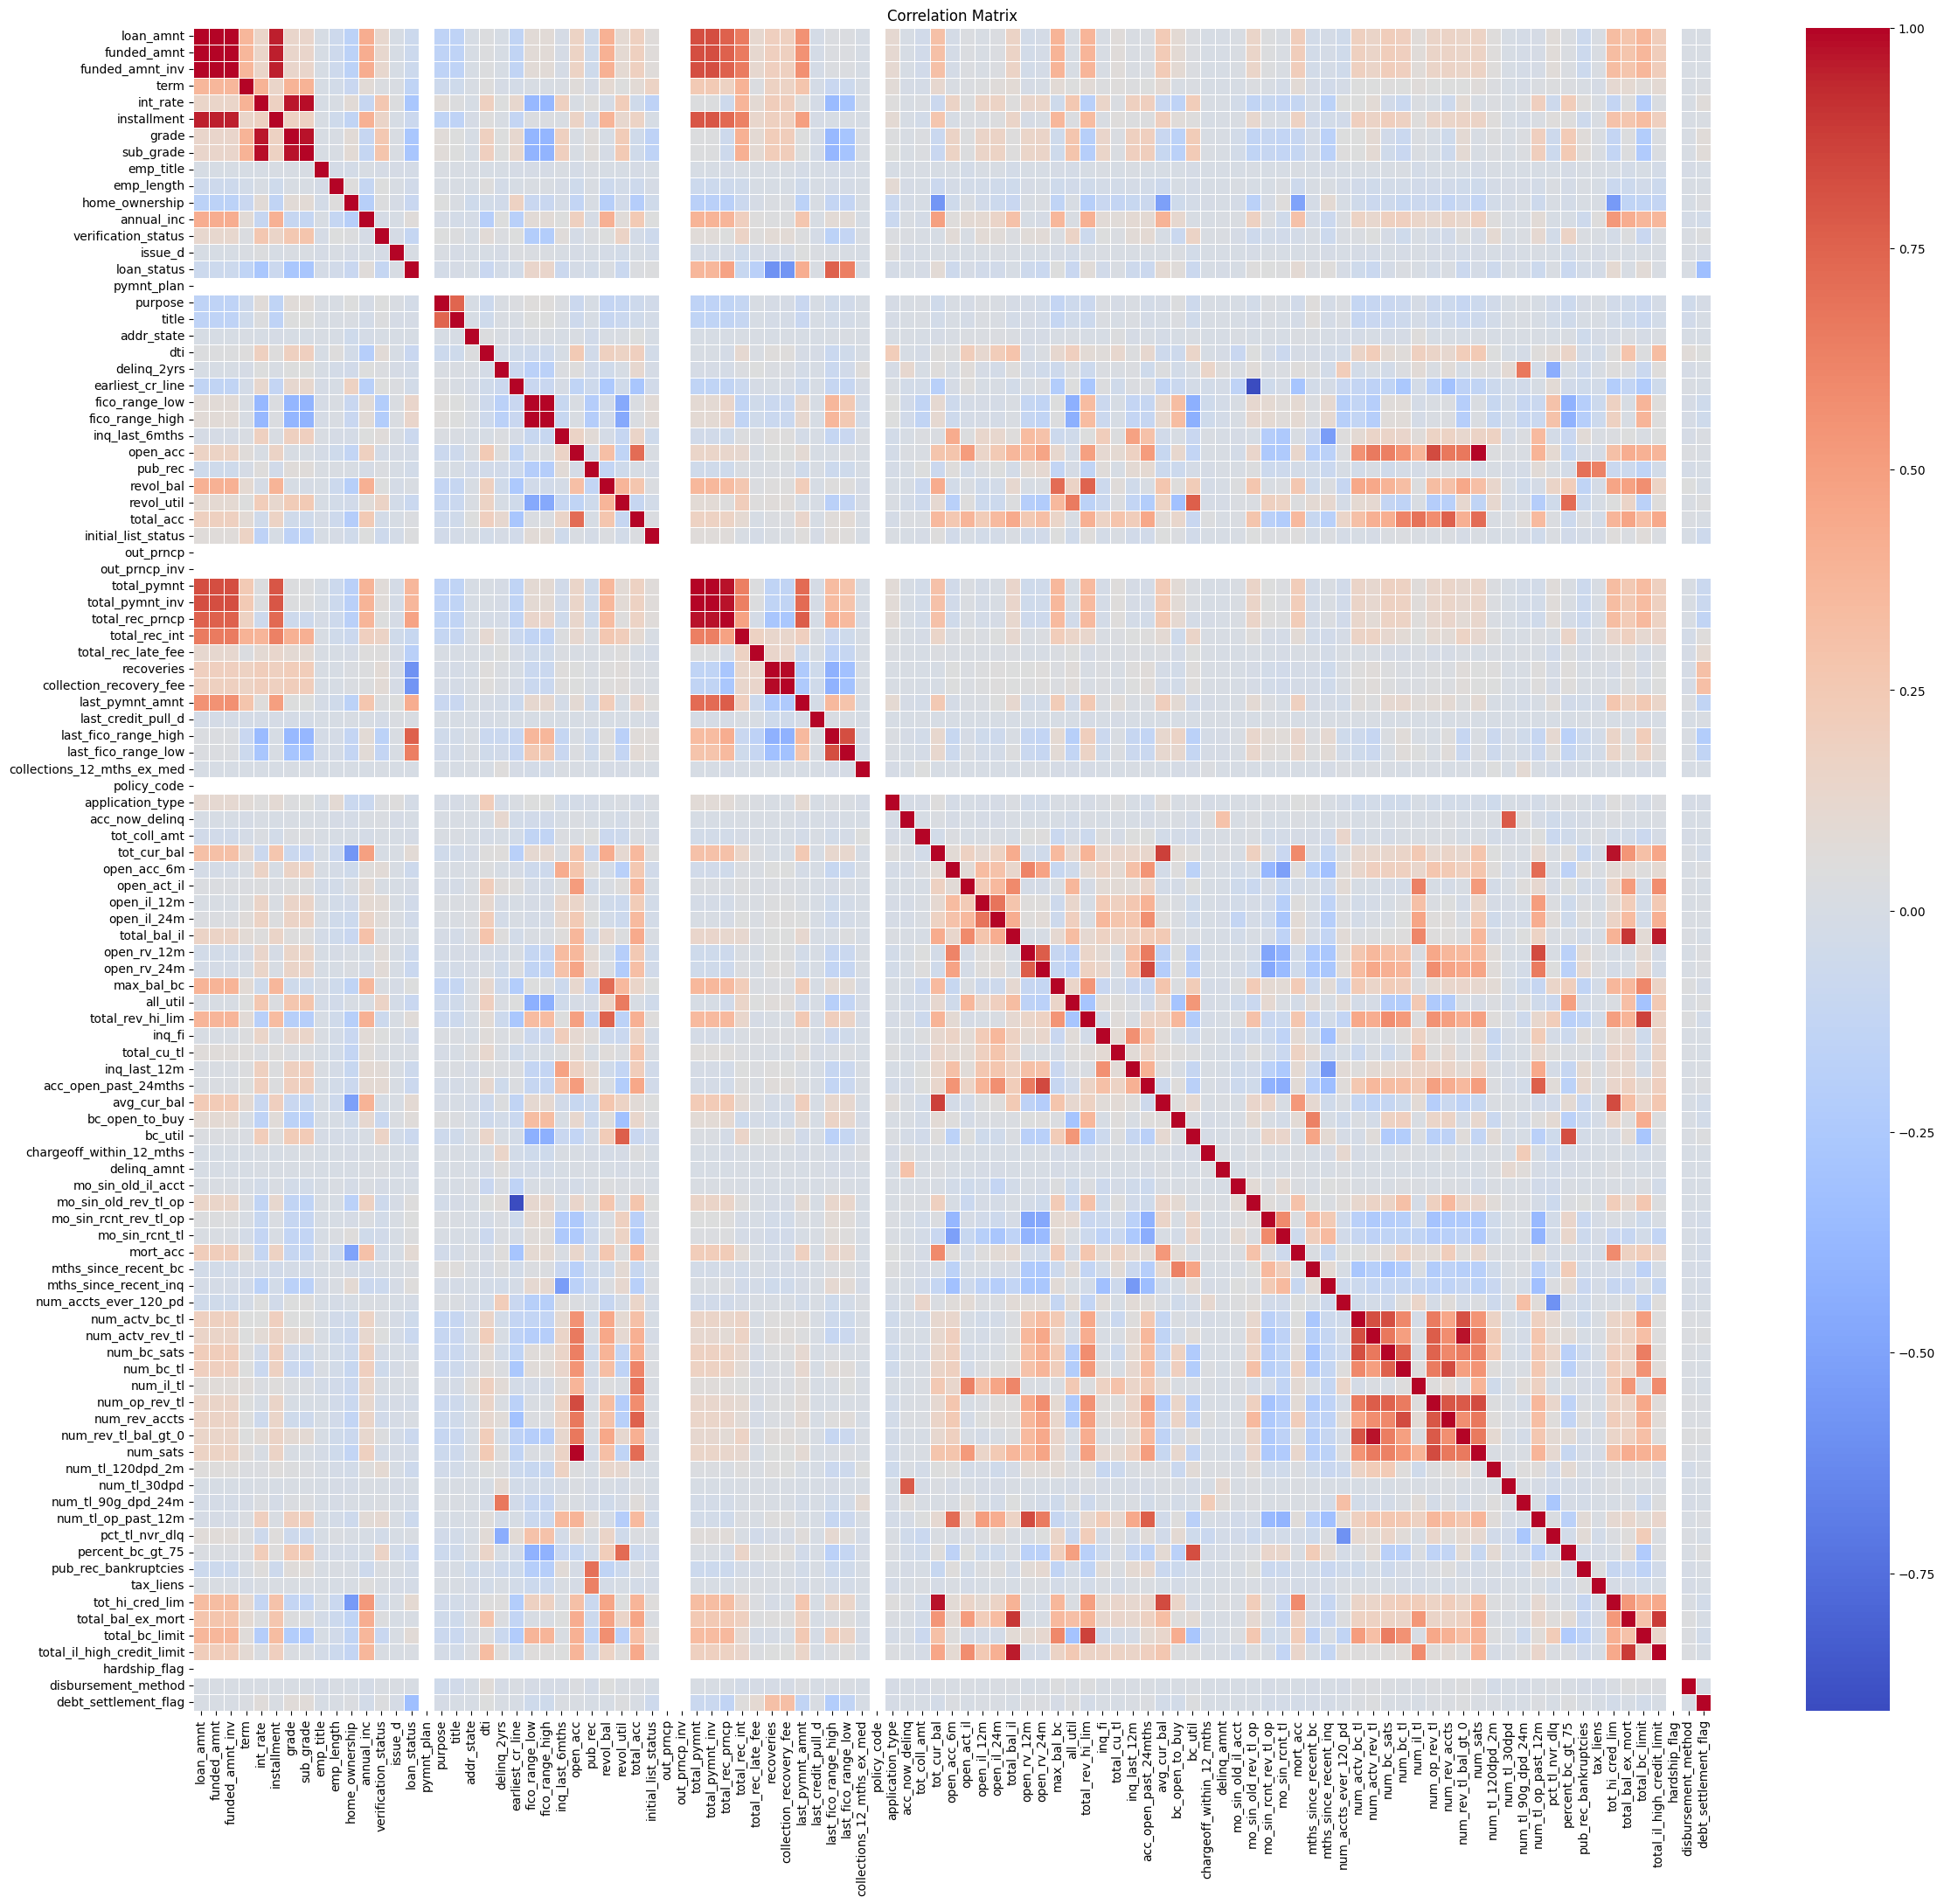

In [14]:
# Correlation Matrix
plt.figure(figsize=(28, 25))
corr_matrix = category_data.corr() 
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.1f',linewidth=.5)
plt.title('Correlation Matrix')
plt.show()


# features I am removing since they are very correlated to another variable, and there giving the same information.: 
# funded_amnt , funded_amnt_inv, sub_grade, collection_recovery_fee, fico_range_low
# , num_stats, total_pymnt_inv, total_rec_prncp, last_fico_range_low
#  tot_hi_cred_lim, total_il_high_credit_limit,  num_rev_tl_bal_gt_0

# installent very correlated to loan_amount 

# maybe:
#  either avg_cur_bal or tot_cur_bal  - also correlated to these 2 is tot_hi_cred_lim
# closely correlated: total_bal_il and total_il_high_credit_limit and total_bal_ex_mort
# total_rev_hi_lim and total_bc_imit
# num_active_rev_tl and num_rev_tl_bal_gt_0
# total_bal_ex_mort and total_il_high_credit_limit


# tot_hi_cred_lim and tot_cur_bal  -- very similar correlations  

# tot_cur_bal - Total current balance of all accounts
# avg_cur_bal - Average current balance of all accounts
# total_bal_il - Total current balance of all installment accounts
# total_il_high_credit_limit - Total installment high credit/credit limit
# total_bal_ex_mort - Total credit balance excluding mortgage
# total_rev_hi_lim  - Total revolving high credit/credit limit
# total_bc_limit - Total bankcard high credit/credit limit
# num_actv_rev_tl - Number of currently active revolving trades
# num_rev_tl_bal_gt_0 - Number of revolving trades with balance >0
# tot_hi_cred_lim - Total high credit/credit limit


# features that arent correlated to anything:

# pymnt_plan, out_prncp, out_prncp_inv, policy_code, hardship_flag